In [1]:
import netCDF4
import numpy
import math
from pyhdf.SD import SD
import pickle
import matplotlib.pyplot as plt
import shapely
import geopandas

In [2]:
#fname = '../colocation/VNP03IMG.A2020032.2048.001.2020045173229.nc'
#dataset = netCDF4.Dataset(fname, 'r', format='NETCDF4')
#lat = dataset['geolocation_data']['latitude'][:].data
#lon = dataset['geolocation_data']['longitude'][:].data

#lat = numpy.array(lat).flatten()
#lon = numpy.array(lon).flatten()

In [3]:
fname = '../data/MOD09.A2020032.1940.006.2020034015024.hdf'
hdf = SD(fname)
lat = hdf.select('Latitude').get()#.flatten()
lon = hdf.select('Longitude').get()#.flatten()

In [4]:
x = numpy.cos(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
y = numpy.sin(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
z = numpy.sin(lat/360*math.pi*2)

fov = numpy.array([x, y, z]).transpose()
fov.shape

(1354, 2030, 3)

In [5]:
with open('sb_gc.pickle', 'rb') as out:
    convex_hull_gc = numpy.array(pickle.load(out))
convex_hull_gc.shape

(23, 3)

In [6]:
# m dimension are the great circle constraints
dots = numpy.einsum('jki,mi->jkm', fov, convex_hull_gc)

In [7]:
n_constraints = len(convex_hull_gc)
k, j = numpy.where(numpy.sum(dots>0, axis=2)==n_constraints)

In [8]:
lon[k, j]

array([-137.53214, -137.51875, -137.5054 , ..., -137.14935, -137.13675,
       -137.12416], dtype=float32)

In [9]:
points = []
for j_i, k_i in zip(j, k):
    points.append(shapely.geometry.Point(lon[j_i, k_i], lat[j_i, k_i]))
points = geopandas.GeoDataFrame({'geom': points}).set_geometry('geom')

# Visualization

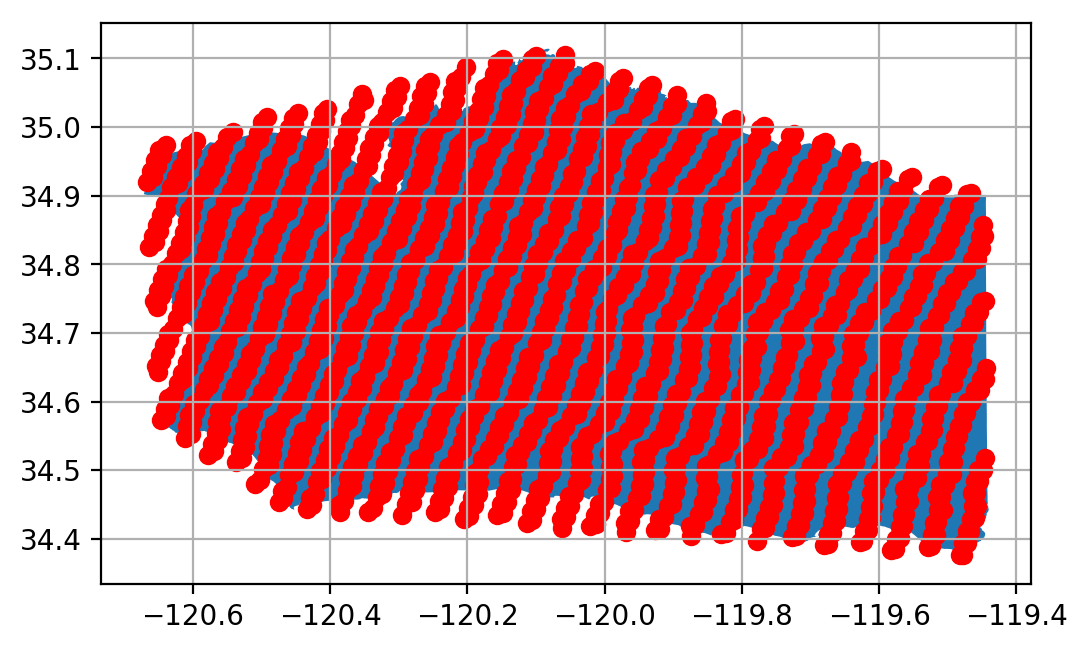

In [10]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

polygons = geopandas.read_file('../data/santa_barbara.gpkg')
polygons.plot(ax=ax)
points.plot(ax=ax, color='r')